# Protocol for Create Montage for Annotation of Supracondylar Lysis {#sec-create-montage-for-supracondylar-lysis}

In [1]:
import glob
import os
import os.path

import matplotlib.pyplot as plt
import numpy as np
import skimage.util
import tifffile
from PIL import Image, ImageOps

## Front Fetlock

We want to compose the fetlock images into a 2x3 image as follow:

- top left: Front Fetlock DPa
- top right: Front Fetlock LM
- mid left: Front Fetlock D45ºL – PAMO
- mid right: Front Fetlock D45ºM – PALO
- bottom left: Front Fetlock Flexed D125º Distal – PAPR Oblique
- bottom right: Front Fetlock Flexed LM

# Input

In [2]:
input_root = "/media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0/"

In [3]:
all_files = glob.glob(
    "/media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0/[lr]/**/*.tiff",
    recursive=True,
)

In [4]:
all_files[0]

'/media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0/r/fore-fetlock/lm/0195.tiff'

# Output

In [5]:
output_root = "/media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0+montage/"

In [6]:
array = tifffile.imread(all_files[1])
array = (array / 65535) * 255
array = array.round().astype("uint8")

im = Image.fromarray(array, mode="L")

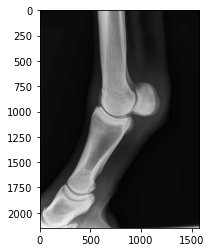

In [7]:
ax = plt.imshow(np.asarray(im), cmap=plt.cm.gray)

In [8]:
im_pad = ImageOps.pad(
    im, (max(im.size), max(im.size)), method=Image.Resampling.BICUBIC, color=0
)

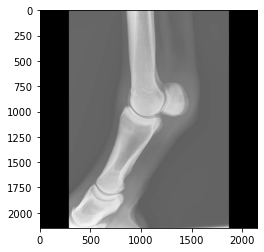

In [9]:
ax = plt.imshow(np.asarray(im_pad), cmap=plt.cm.gray)

In [10]:
im2500 = im_pad.resize((2500, 2500), resample=Image.Resampling.BICUBIC)

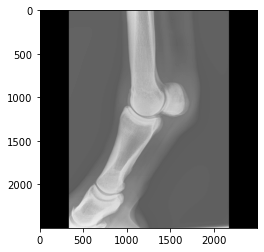

In [11]:
ax = plt.imshow(np.asarray(im2500), cmap=plt.cm.gray)

In [12]:
def pre_image(filename):
    array = tifffile.imread(filename)
    array = (array / 65535) * 255
    array = array.round().astype("uint8")

    im = Image.fromarray(array, mode="L")

    im_pad = ImageOps.pad(
        im, (max(im.size), max(im.size)), method=Image.Resampling.BICUBIC, color=0
    )

    im2500 = im_pad.resize((2500, 2500), resample=Image.Resampling.BICUBIC)

    return np.array(im2500)

We will use scikit-image to do the montage.

In [13]:
os.makedirs(
    "/media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0+montage/l/fore-fetlock/",
    exist_ok=True,
)
os.makedirs(
    "/media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0+montage/r/fore-fetlock/",
    exist_ok=True,
)

In [14]:
all_files = glob.glob(
    "/media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0/[lr]/fore-fetlock/dp/*.tiff"
)

In [15]:
for _file in all_files:
    output = os.path.join(
        output_root, _file[54], "fore-fetlock", os.path.basename(_file)
    )
    output = output.replace(".tiff", ".png")
    print(f"Output: {output}")

    try:
        dp = pre_image(_file)
        # print(f'dp.shape {dp.shape}')
        # print(f'dp.dtype {dp.dtype}')

        lm = pre_image(_file.replace("dp", "lm"))
        # print(f'lm.shape {lm.shape}')
        # print(f'lm.dtype {lm.dtype}')

        dlpmo = pre_image(_file.replace("dp", "dlpmo"))
        # print(f'dlpmo.shape {dlpmo.shape}')
        # print(f'dlpmo.dtype {dlpmo.dtype}')

        dmplo = pre_image(_file.replace("dp", "dmplo"))
        # print(f'dmplo.shape {dmplo.shape}')
        # print(f'dmplo.dtype {dmplo.dtype}')

        flexed_dp = pre_image(_file.replace("dp", "flexed-dp"))
        # print(f'flexed_dp.shape {flexed_dp.shape}')
        # print(f'flexed_dp.dtype {flexed_dp.dtype}')

        flexed_lm = pre_image(_file.replace("dp", "flexed-lm"))
        # print(f'flexed_lm.shape {flexed_lm.shape}')
        # print(f'flexed_lm.dtype {flexed_lm.dtype}')

        radiograph_set = np.array(
            [
                dp[0:2500, 0:2500],
                lm[0:2500, 0:2500],
                dlpmo[0:2500, 0:2500],
                dmplo[0:2500, 0:2500],
                flexed_dp[0:2500, 0:2500],
                flexed_lm[0:2500, 0:2500],
            ]
        )
        # print(f'radiograph_set.shape {radiograph_set.shape}')
        # print(f'radiograph_set.dtype {radiograph_set.dtype}')

        m = skimage.util.montage(
            radiograph_set, rescale_intensity=0, grid_shape=(3, 2), padding_width=0
        )

        skimage.io.imsave(output, m)
    except BaseException as err:
        print(f"Fail to create {output}.\n\t{err}")

Output: /media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0+montage/r/fore-fetlock/0195.png
Output: /media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0+montage/r/fore-fetlock/0020.png
Output: /media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0+montage/r/fore-fetlock/0197.png
Output: /media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0+montage/r/fore-fetlock/0053.png
Output: /media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0+montage/r/fore-fetlock/0021.png
Output: /media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0+montage/r/fore-fetlock/0057.png
Output: /media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0+montage/r/fore-fetlock/0070.png
Output: /media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0+montage/r/fore-fetlock/0188.png
Output: /media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0+montage/r/fore-fetlock/0011.png
Output: /media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.0+montage/r/fore-fetlock/0005.png
Output: /media/raniere/CityU/hkjc/pre-sale-radiographs-v1.1.